In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import xrft
import rioxarray
import xarray as xr
import cartopy.crs as crs
%matplotlib inline
# data from https://oceandata.sci.gsfc.nasa.gov/ob/getfile/A2020113184000.L2_LAC_OC.nc
#fn = 'A2020113184000.L2_LAC_OC.nc'
fn = 'data/AQUA_MODIS.20211109T180501.L2.OC.nc'
#fn = 'A2019338181500.L2_LAC_OC.nc'

In [4]:
xds = xr.open_dataset(fn)

In [5]:
from netCDF4 import Dataset
dataset = Dataset(fn)
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MODISA Level-2 Data
    product_name: AQUA_MODIS.20211109T180501.L2.OC.nc
    processing_version: R2022.0
    equatorCrossingLongitude: 102.31477
    orbit_number: 103824
    history: l2gen par=/data17/sdpsoper/vdc/vpu16/workbuf/A2021313180500.L1B_LAC.param metafile=AQUA_MODIS.20211109T180501.L2.OC.nc.meta
    instrument: MODIS
    platform: Aqua
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: R2022.0/L2/AQUA_MODIS.20211109T180501.L2.OC.nc
    date_created: 2022-09-09T11:27:15.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Ocean Color
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Labo

In [6]:
gd=dataset.groups['geophysical_data']
nav=dataset.groups['navigation_data']
lons = nav.variables["longitude"][:]
lats = nav.variables["latitude"][:]

flags= gd.variables["l2_flags"][:]
gd.variables.keys()

dict_keys(['aot_869', 'angstrom', 'Rrs_412', 'Rrs_443', 'Rrs_469', 'Rrs_488', 'Rrs_531', 'Rrs_547', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'chlor_a', 'Kd_490', 'pic', 'poc', 'ipar', 'nflh', 'par', 'l2_flags'])

In [ ]:
443,482,562,665,865

In [82]:
# create the sst dataset
rrs_xds = xr.Dataset(
                    {
                        'Rrs_412':(('x', 'y'),gd.variables['Rrs_412'][:].data),
                        'Rrs_443':(('x', 'y'),gd.variables['Rrs_443'][:].data),
                        'Rrs_469':(('x', 'y'),gd.variables['Rrs_469'][:].data),
                        'Rrs_488':(('x', 'y'),gd.variables['Rrs_488'][:].data),
                        'Rrs_531':(('x', 'y'),gd.variables['Rrs_531'][:].data),
                        'Rrs_547':(('x', 'y'),gd.variables['Rrs_547'][:].data),
                        'Rrs_555':(('x', 'y'),gd.variables['Rrs_555'][:].data),
                        'Rrs_645':(('x', 'y'),gd.variables['Rrs_645'][:].data),
                        'Rrs_667':(('x', 'y'),gd.variables['Rrs_667'][:].data),
                        'Rrs_678':(('x', 'y'),gd.variables['Rrs_678'][:].data),                        
                    },
                    coords = {'latitude': (('x', 'y'), lats),
                              'longitude': (('x', 'y'), lons)},
                    #attrs={'variable':'Rrs_443'}
                    )
rrs_xds

<xarray.Dataset>
Dimensions:    (x: 2030, y: 1354)
Coordinates:
    latitude   (x, y) float32 29.74 29.74 29.74 29.74 ... 43.54 43.52 43.51
    longitude  (x, y) float32 -59.89 -59.94 -59.99 ... -91.39 -91.44 -91.49
Dimensions without coordinates: x, y
Data variables:
    Rrs_412    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_443    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_469    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_488    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_531    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_547    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_555    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_645    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_667    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04
    Rrs_678    (x, y) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04

In [91]:
rrs_xds = rrs_xds.where(rrs_xds['Rrs_443'] != -32767.0)

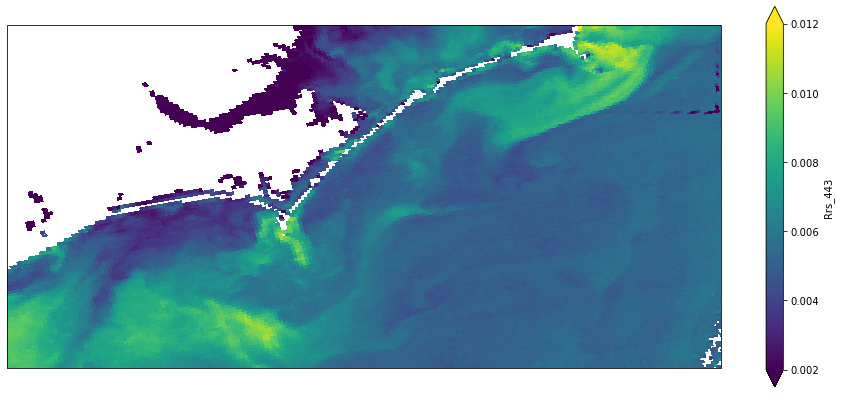

In [97]:
# fig, ax = plt.subplots(figsize=(12,7))
fig,ax = plt.subplots(figsize=(16,7), subplot_kw=dict(projection=crs.UTM('18N')))


rrs_xds.Rrs_443.plot(ax=ax, x='longitude', y='latitude',vmin=0.002, vmax=.012, cmap='viridis')


ax.set_xlim(-77.5,-75)
ax.set_ylim(34.1,35.3)

fig.savefig('modisa_hatteras_blue.png',dpi=300)

In [ ]:
34.344605, -75.543633

34.34012,-75.538168

In [45]:
rrs_xds

<xarray.Dataset>
Dimensions:    (x: 2030, y: 1354)
Coordinates:
    latitude   (x, y) float32 29.74 29.74 29.74 29.74 ... 43.54 43.52 43.51
    longitude  (x, y) float32 -59.89 -59.94 -59.99 ... -91.39 -91.44 -91.49
Dimensions without coordinates: x, y
Data variables:
    Rrs_443    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_469    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_488    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_531    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_547    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_555    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_645    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_667    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_678    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [94]:
# rrs_xds_sub = 
# rrs_xds.sel(latitude=slice(34.344605,34.34012),longitude=slice(-75.543633,-75.538168))#.mean(dim=('x','y'))

xds_subset = rrs_xds.where((rrs_xds.latitude>=34.3) & (rrs_xds.latitude<=34.4), drop=True)
xds_subset = xds_subset.where((xds_subset.longitude>=-75.8) & (xds_subset.longitude<=-75.6), drop=True)
xds_subset

<xarray.Dataset>
Dimensions:    (x: 428, y: 118)
Coordinates:
    latitude   (x, y) float32 32.91 32.91 32.9 32.9 32.9 ... 36.5 36.5 36.5 36.5
    longitude  (x, y) float32 -74.45 -74.46 -74.47 ... -76.99 -77.01 -77.02
Dimensions without coordinates: x, y
Data variables:
    Rrs_412    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_443    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_469    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_488    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_531    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_547    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_555    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_645    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_667    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Rrs_678    (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


(34.2, 35.3)

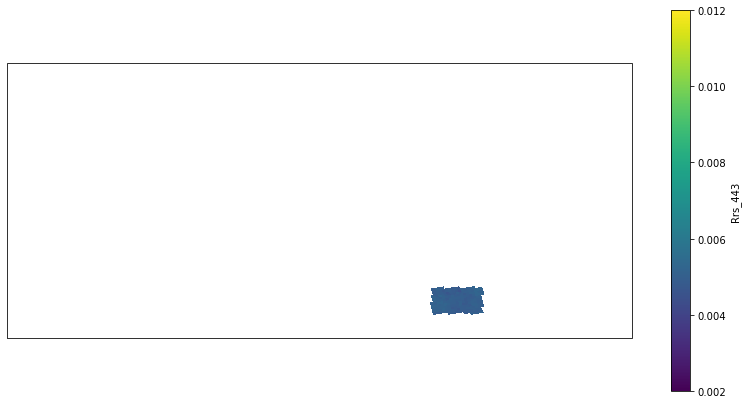

In [95]:
# fig, ax = plt.subplots(figsize=(12,7))
fig,ax = plt.subplots(figsize=(14,7), subplot_kw=dict(projection=crs.UTM('18N')))


xds_subset.Rrs_443.plot(ax=ax, x='longitude', y='latitude',vmin=0.002, vmax=.012, cmap='viridis')


ax.set_xlim(-77.5,-75)
ax.set_ylim(34.2,35.3)

In [89]:
wavelengths = [int(i[4:]) for i in xds_subset.data_vars]
wavelengths

[412, 443, 469, 488, 531, 547, 555, 645, 667, 678]

In [96]:
[np.nanmean(xds_subset[i].values.flatten()) for i in xds_subset.data_vars]

[0.0060261204,
 0.0049827616,
 0.004647762,
 0.004143001,
 0.0019218815,
 0.0014784792,
 0.0012422072,
 0.00013921835,
 0.0001760877,
 0.00019414212]

In [98]:
[np.nanstd(xds_subset[i].values.flatten()) for i in xds_subset.data_vars]

[0.00020520067,
 0.00012432382,
 0.00011302569,
 8.45212e-05,
 4.9745453e-05,
 4.295849e-05,
 6.1743296e-05,
 3.7398597e-05,
 2.1110234e-05,
 1.736576e-05]

In [86]:
np.count_nonzero(~np.isnan(xds_subset['Rrs_443'].values.flatten()))

184

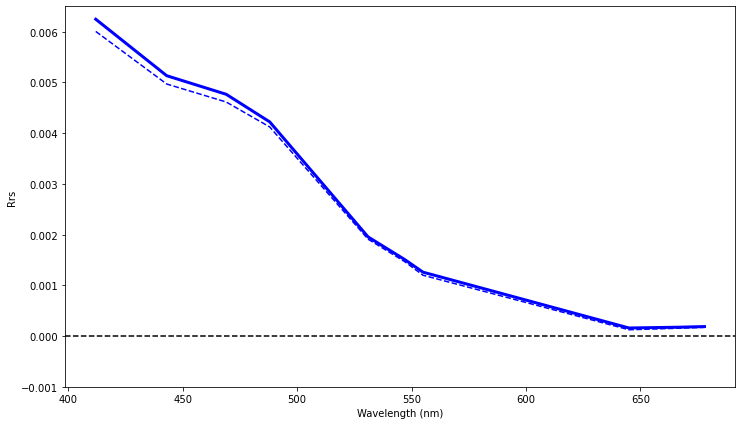

In [87]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(np.array(wavelengths),np.array([np.nanmean(xds_subset[i].values.flatten()) for i in xds_subset.data_vars]),color='blue',alpha=1,lw=3)
ax.plot(np.array(wavelengths),np.array([np.nanmean(xds_subset[i].values.flatten())-np.nanstd(xds_subset[i].values.flatten()) for i in xds_subset.data_vars]),color='blue',alpha=1,ls='--')

# ax.plot(np.array([443,482,562,665,865]),np.array([ds_aq_mean[i].values.flatten().mean()+ds_aq_mean[i].values.flatten().std() for i in ds_aq_mean.data_vars]),color='blue',alpha=1,ls='--')
# ax.plot(np.array([443,482,562,665,865]),np.array([ds_aq_mean[i].values.flatten().mean()-ds_aq_mean[i].values.flatten().std() for i in ds_aq_mean.data_vars]),color='blue',alpha=1,ls='--')

ax.set_ylabel('Rrs')
ax.set_xlabel('Wavelength (nm)')

ax.set_ylim(-0.001,0.0065)


ax.axhline(0,ls='--',c='k')
# plt.savefig('Rrs_comparison.png',dpi=450)
plt.show()

[443, 469, 488, 531, 547, 555, 645, 667, 678]